### Simulation/Generation of Biomarkers

In [1]:
from biomarker_simulation import BiomarkerSimulation
from biomarker_utils import generate_transition_matrix, initialize_biomarkers
from mcmc_analysis import MCMCAnalysis
import numpy as np
import matplotlib.pyplot as plt

# specify common parameters for biomarker stages
n_patients_stage = {
    1: 200, 2: 250, 3: 200, 4: 70, 5: 80,
    6: 60, 7: 50, 8: 40, 9: 40, 10: 30,
}

In [2]:
# Sigmoid Parameters
biomarkers_params_sigmoid = {
    0: {'s': 6, 'c': 3},
    1: {'s': 12, 'c': 12},
    2: {'s': 17, 'c': 10},
    3: {'s': 23, 'c': 11},
    4: {'s': 28, 'c': 2},
    5: {'s': 34, 'c': 12},
    6: {'s': 40, 'c': 10},
    7: {'s': 45, 'c': 8},
    8: {'s': 51, 'c': 6},
    9: {'s': 57, 'c': 5},
    10: {'s': 62, 'c': 2}
}

# Instantiate and simulate using the sigmoid model
simulator_sigmoid = BiomarkerSimulation(n_patients_stage, biomarkers_params_sigmoid, method='sigmoid_inv')
X_sigmoid, y_sigmoid, stages_sigmoid = simulator_sigmoid.simulate()
print("Sigmoidal Model:")
print("X shape:", X_sigmoid.shape)
print("Y shape:", y_sigmoid.shape)


Sigmoidal Model:
X shape: (1020, 11)
Y shape: (1020,)


In [3]:
from scipy.stats import spearmanr

# MCMC Analysis
mcmc_analysis_sigmoid = MCMCAnalysis(X_sigmoid, y_sigmoid)

# Get log distributions
log_p_e_sigmoid, log_p_not_e_sigmoid = mcmc_analysis_sigmoid.log_distributions()

# Greedy ascent to find initial good order
order_sigmoid, loglike_sigmoid = mcmc_analysis_sigmoid.greedy_ascent()
print("Initial order from greedy ascent (sigmoid):", order_sigmoid[:10])

# Perform MCMC to sample from the posterior distribution of orders
orders_sigmoid, loglikes_sigmoid, _, _ = mcmc_analysis_sigmoid.mcmc()
print("First 10 MCMC sampled orders (sigmoid):", orders_sigmoid[:10])

# Calculate Spearman's rho for the first sampled order
rho_sigmoid, _ = spearmanr(order_sigmoid, orders_sigmoid[0])
print("Spearman's rho between initial greedy and first MCMC order (sigmoid):", rho_sigmoid)


AttributeError: 'MCMCAnalysis' object has no attribute 'log_distributions'

#### MCMC analysis of Transition Matrix based biomarkers

In [7]:
# MCMC Analysis
mcmc_analysis_transition = MCMCAnalysis(X_transition, y_transition)

# Get log distributions
log_p_e_transition, log_p_not_e_transition = mcmc_analysis_transition.log_distributions()

# Greedy ascent to find initial good order
order_transition, loglike_transition = mcmc_analysis_transition.greedy_ascent()
print("Initial order from greedy ascent (transition matrix):", order_transition[:10])

# Perform MCMC to sample from the posterior distribution of orders
orders_transition, loglikes_transition, _, _ = mcmc_analysis_transition.mcmc()
print("First 10 MCMC sampled orders (transition matrix):", orders_transition[:10])

# Calculate Spearman's rho for the first sampled order
rho_transition, _ = spearmanr(order_transition, orders_transition[0])
print("Spearman's rho between initial greedy and first MCMC order (transition matrix):", rho_transition)


Initial order from greedy ascent (transition matrix): [2 4 9 1 5 7 6 3 8 0]


ValueError: not enough values to unpack (expected 4, got 2)

In [4]:
# Transition Matrix Parameters
num_biomarkers = 11
A = generate_transition_matrix(size=num_biomarkers, coeff=1e-1)
y_init = initialize_biomarkers(num_biomarkers, init_value=0.9)

biomarkers_params_transition = {
    'transition_matrix': A[1:, 1:],  # assume first row/column are removed
    'y_init': y_init[1:]  # assume first value is removed
}

# Instantiate and simulate using the transition matrix model
simulator_transition = BiomarkerSimulation(n_patients_stage, biomarkers_params_transition, method='transition_matrix')
X_transition, y_transition, stages_transition = simulator_transition.simulate()
print("Transition Matrix Model:")
print("X shape:", X_transition.shape)
print("Y shape:", y_transition.shape)


Transition Matrix Model:
X shape: (1020, 10)
Y shape: (1020,)


ODE Model:
Time points shape: (1000,)
Biomarker values shape: (1000, 11)


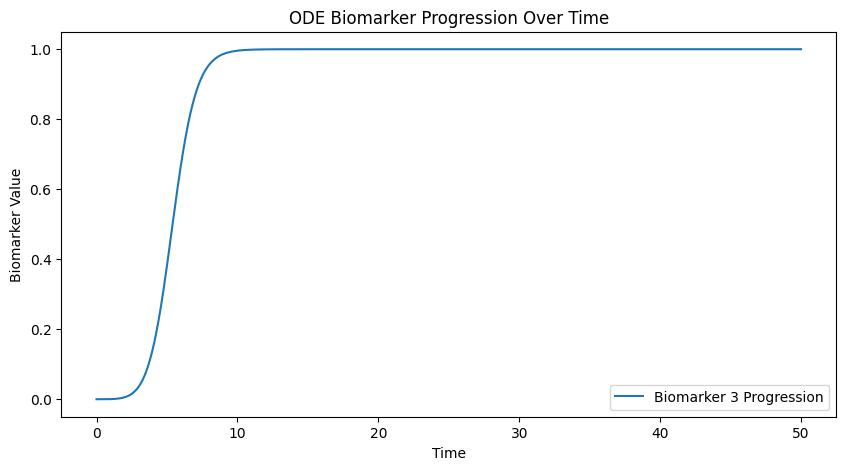

In [13]:
# Parameters for the ODE simulation
biomarkers_params_ode = {
    'connectivity_matrix': generate_transition_matrix(size=11, coeff=0.1),
    'y_init': initialize_biomarkers(11, init_value=0.9),
    't_span': (0, 50),
    'n_steps': 1000
}

# Instantiate the simulation class with ODE parameters
simulator_ode = BiomarkerSimulation(n_patients_stage, biomarkers_params_ode, method='ode')

# Run the ODE-based simulation
y_ode, X_ode = simulator_ode.simulate()  # Corrected to use simulate()

# Print out the results
print("ODE Model:")
print("Time points shape:", t_ode.shape)
print("Biomarker values shape:", X_ode.shape)

# Optionally plot a biomarker's progression over time
plt.figure(figsize=(10, 5))
plt.plot(t_ode, X_ode[:, 3], label='Biomarker 3 Progression')  # Adjust according to the returned dimensions
plt.title("ODE Biomarker Progression Over Time")
plt.xlabel('Time')
plt.ylabel('Biomarker Value')
plt.legend()
plt.show()

#### MCMC analysis of ODE based biomarkers

In [14]:
# Assuming X_ode is shaped appropriately and y_ode is defined
# MCMC Analysis
mcmc_analysis_ode = MCMCAnalysis(X_ode, y_ode)

# Get log distributions
log_p_e_ode, log_p_not_e_ode = mcmc_analysis_ode.log_distributions()

# Greedy ascent to find initial good order
order_ode, loglike_ode = mcmc_analysis_ode.greedy_ascent()
print("Initial order from greedy ascent (ODE):", order_ode[:10])

# Perform MCMC to sample from the posterior distribution of orders
orders_ode, loglikes_ode, _, _ = mcmc_analysis_ode.mcmc()
print("First 10 MCMC sampled orders (ODE):", orders_ode[:10])

# Calculate Spearman's rho for the first sampled order
rho_ode, _ = spearmanr(order_ode, orders_ode[0])
print("Spearman's rho between initial greedy and first MCMC order (ODE):", rho_ode)


c:\Users\semch\Projects\LAMCIG\Progression_models_simulations\simulation_class\mcmc_analysis.py:12: RuntimeWarning: invalid value encountered in log
  log_p_not_e = np.log(((len(self.y) - self.y.sum()) / len(self.y)) * np.ones_like(self.y))


Initial order from greedy ascent (ODE): [ 2  1 10  4  5  7  9  6  3  8]


ValueError: not enough values to unpack (expected 4, got 2)